# How are in-demand skills trending for Data Analysts?

In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [99]:
df_US = df_clean[df_clean['job_country']=='United States'].copy()
df_US = df_US[df_US['job_title_short']=='Data Analyst']
df_US['month_no'] = df_US['job_posted_date'].dt.month

In [100]:
df_skills = df_US.copy()
df_skills = df_skills.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785124,Data Analyst,Data Governance Analyst,"Washington, DC",via Jobs Trabajo.org,Full-time,False,"New York, United States",2023-12-12 06:00:28,True,False,United States,None,NaN,NaN,"PATRIOT SOLUTIONS GROUP, LLC",jira,"{'async': ['jira'], 'programming': ['html', 'j...",12
785204,Data Analyst,"Director, Data Quality Analysis","Atlanta, GA",via Trabajo.org,Full-time,False,Georgia,2023-10-10 07:06:04,False,False,United States,None,NaN,NaN,IMG LIVE,None,None,10
785481,Data Analyst,Legal Operations Data Analyst,"Atlanta, GA",via LinkedIn,Full-time,False,Georgia,2023-01-10 06:39:45,False,True,United States,None,NaN,NaN,Latitude Legal,tableau,{'analyst_tools': ['tableau']},1
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,microsoft teams,{'sync': ['microsoft teams']},10


In [101]:
df_pivot = df_skills.pivot_table(index='month_no',columns='job_skills',aggfunc='size', fill_value=0)
df_pivot.loc['Total']=df_pivot.sum(axis=0)
df_final = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).head(5).index]
df_final = df_final.drop('Total')
df_final

job_skills,sql,excel,tableau,python,sas
month_no,,,,,
1,2770,2272,1508,1327,1092
2,1867,1549,982,934,684
3,1885,1607,1073,980,706
4,1850,1529,1026,932,776
5,1410,1238,765,717,502
6,1643,1391,936,870,570
7,1600,1321,936,831,566
8,2083,1704,1198,1198,734
9,1546,1245,893,815,546


In [102]:
DA_Total = df_US.groupby('month_no').size()
DA_Total

month_no
1     5250
2     3679
3     3764
4     3607
5     2865
6     3374
7     3268
8     4130
9     3202
10    3676
11    2994
12    2838
dtype: int64

In [112]:
df_percent = df_final.div(DA_Total/100,axis=0)
df_percent

job_skills,sql,excel,tableau,python,sas
month_no,,,,,
1,52.761905,43.276190,28.723810,25.276190,20.800000
2,50.747486,42.103833,26.692036,25.387334,18.592009
3,50.079702,42.693943,28.506908,26.036132,18.756642
4,51.289160,42.389798,28.444691,25.838647,21.513723
5,49.214660,43.211169,26.701571,25.026178,17.521815
6,48.695910,41.227030,27.741553,25.785418,16.893894
7,48.959608,40.422277,28.641371,25.428397,17.319461
8,50.435835,41.259080,29.007264,29.007264,17.772397
9,48.282324,38.881949,27.888819,25.452842,17.051843


## Change the index to Jan, Feb....

In [122]:
df_percent = df_final.div(DA_Total/100,axis=0)
df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent = df_percent.set_index('job_posted_month')
df_percent = df_percent.drop(columns='month_no')
df_percent

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,52.761905,43.276190,28.723810,25.276190,20.800000
Feb,50.747486,42.103833,26.692036,25.387334,18.592009
Mar,50.079702,42.693943,28.506908,26.036132,18.756642
Apr,51.289160,42.389798,28.444691,25.838647,21.513723
May,49.214660,43.211169,26.701571,25.026178,17.521815
Jun,48.695910,41.227030,27.741553,25.785418,16.893894
Jul,48.959608,40.422277,28.641371,25.428397,17.319461
Aug,50.435835,41.259080,29.007264,29.007264,17.772397
Sep,48.282324,38.881949,27.888819,25.452842,17.051843


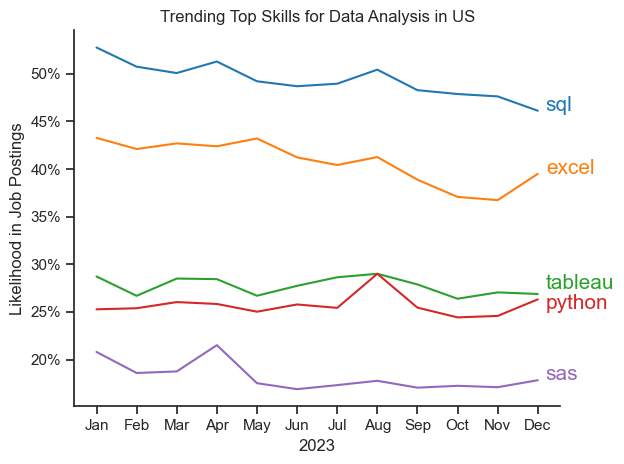

In [155]:
df_plot = df_percent.copy()
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysis in US')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

offsets=[0,0,0.5,-1,0]

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i] + offsets[i], df_plot.columns[i], fontsize=15, color=sns.color_palette('tab10')[i])

plt.tight_layout()
plt.show()